# Visualizing Word Vectors with t-SNE

TSNE is pretty useful when it comes to visualizing similarity between objects. It works by taking a group of high-dimensional (100 dimensions via Word2Vec) vocabulary word feature vectors, then compresses them down to 2-dimensional x,y coordinate pairs. The idea is to keep similar words close together on the plane, while maximizing the distance between dissimilar words. 

### Steps

1. Clean the data
2. Build a corpus
3. Train a Word2Vec Model
4. Visualize t-SNE representations of the most common words 

Credit: Some of the code was inspired by this awesome [NLP repo][1]. 




  [1]: https://github.com/rouseguy/DeepLearningNLP_Py

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline


In [5]:
file_name = 'input.txt'
data = []
for row in open(file_name, 'r'):
    data.append(row)

In [40]:
len(data)

3336

In [7]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ahmad/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence



In [61]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []

    for sentence in data:
        word_list = sentence.split(" ")
        corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:10]

[["ALICE'S", 'ADVENTURES', 'IN', 'WONDERLAND\n'],
 ['\n'],
 ['Lewis', 'Carroll\n'],
 ['\n'],
 ['THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', '3.0\n'],
 ['\n'],
 ['CHAPTER', 'I.', 'Down', 'the', 'Rabbit-Hole\n'],
 ['\n'],
 ['Alice',
  'was',
  'beginning',
  'to',
  'get',
  'very',
  'tired',
  'of',
  'sitting',
  'by',
  'her',
  'sister',
  'on',
  'the\n'],
 ['bank,',
  'and',
  'of',
  'having',
  'nothing',
  'to',
  'do:',
  'once',
  'or',
  'twice',
  'she',
  'had',
  'peeped',
  'into',
  'the\n']]

In [62]:
len(corpus)

3336

# Word 2 Vec

The Word to Vec model produces a vocabulary, with each word being represented by an n-dimensional numpy array (100 values in this example)

In [63]:
'''
corpus = []
for i in range(1000):
    corpus.append(['Hello', 'World'])
'''

"\ncorpus = []\nfor i in range(1000):\n    corpus.append(['Hello', 'World'])\n"

In [64]:
#corpus

In [69]:
model = word2vec.Word2Vec(iter=1)
model.build_vocab(corpus)

In [70]:
model.wv.vocab

{'\n': <gensim.models.keyedvectors.Vocab at 0x7fb70ddca748>,
 'THE': <gensim.models.keyedvectors.Vocab at 0x7fb70ddca898>,
 'CHAPTER': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2080>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2160>,
 'Alice': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2198>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd21d0>,
 'beginning': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2208>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2240>,
 'get': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2278>,
 'very': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd22b0>,
 'tired': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd22e8>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2320>,
 'sitting': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2358>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2390>,
 'her': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd23c8>,
 'sister': <gensim.models.keyedvectors.Vocab at 0x7fb70

In [74]:
model.train(sentences=corpus,total_examples=len(corpus), epochs=10) 

(133114, 283710)

In [75]:
model.wv.vocab

{'\n': <gensim.models.keyedvectors.Vocab at 0x7fb70ddca748>,
 'THE': <gensim.models.keyedvectors.Vocab at 0x7fb70ddca898>,
 'CHAPTER': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2080>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2160>,
 'Alice': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2198>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd21d0>,
 'beginning': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2208>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2240>,
 'get': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2278>,
 'very': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd22b0>,
 'tired': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd22e8>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2320>,
 'sitting': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2358>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd2390>,
 'her': <gensim.models.keyedvectors.Vocab at 0x7fb70ddd23c8>,
 'sister': <gensim.models.keyedvectors.Vocab at 0x7fb70

In [78]:
model = word2vec.Word2Vec(corpus[0], size=100, window=20, min_count=200, workers=4)
model.wv.vocab

RuntimeError: you must first build vocabulary before training the model

In [76]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


KeyboardInterrupt: 

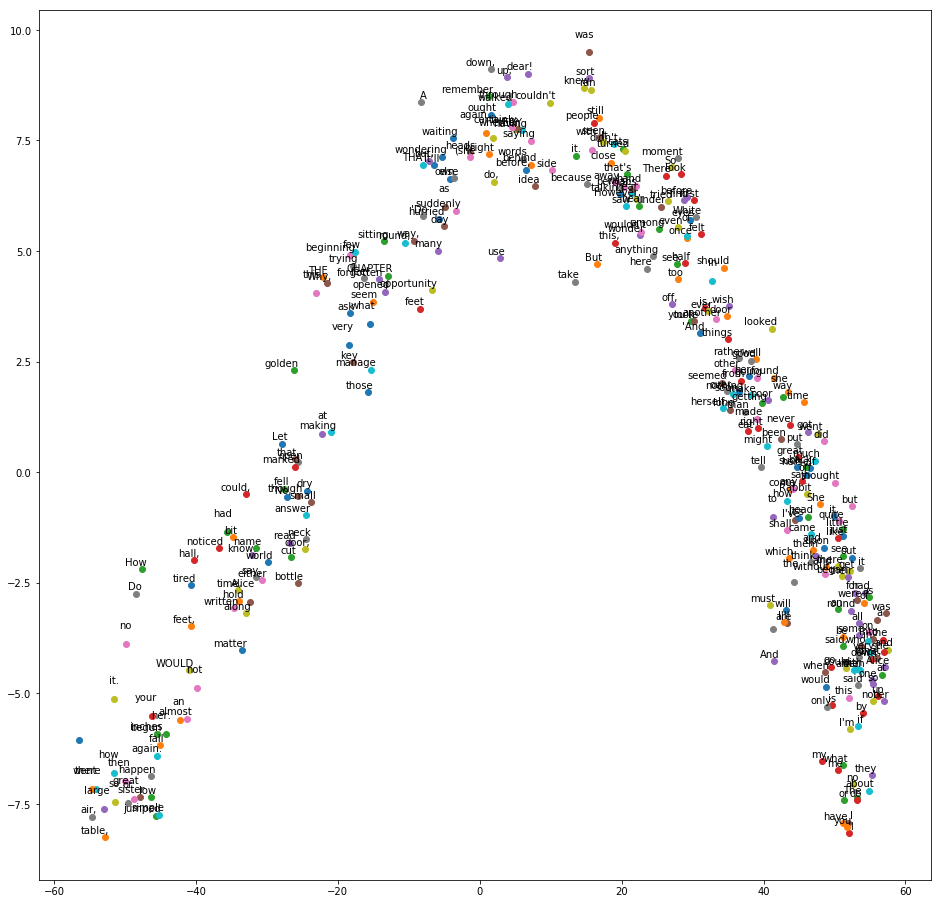

In [77]:
tsne_plot(model)

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


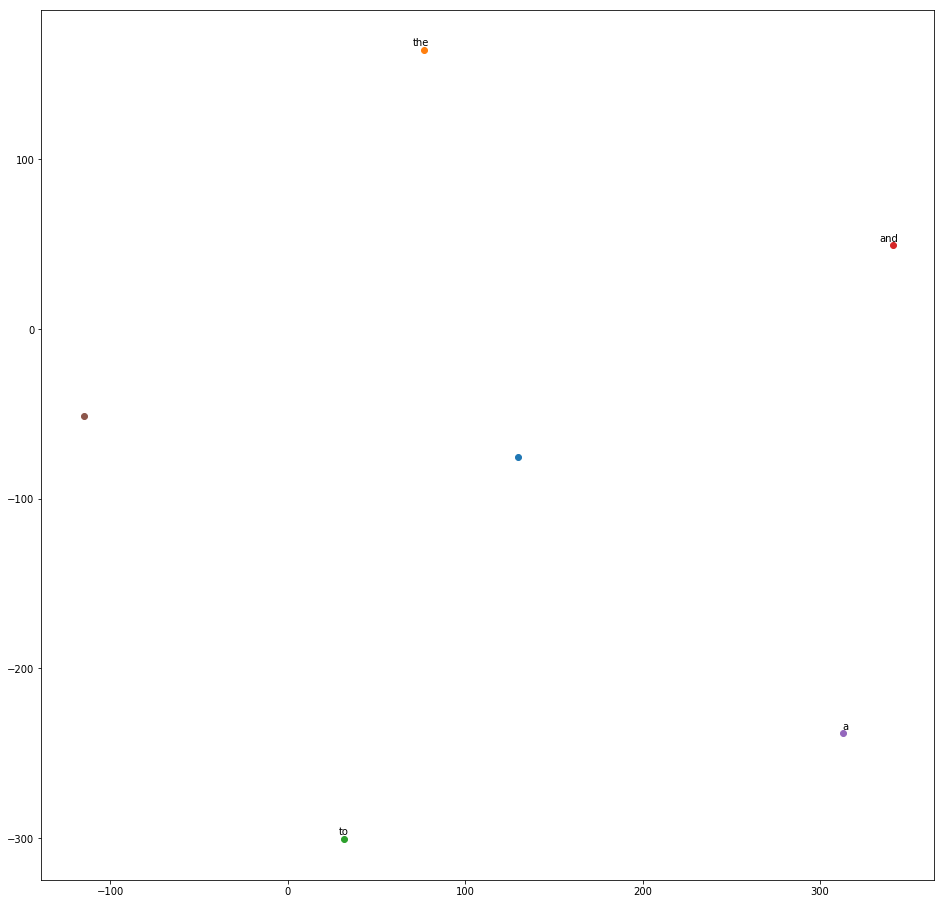

In [19]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


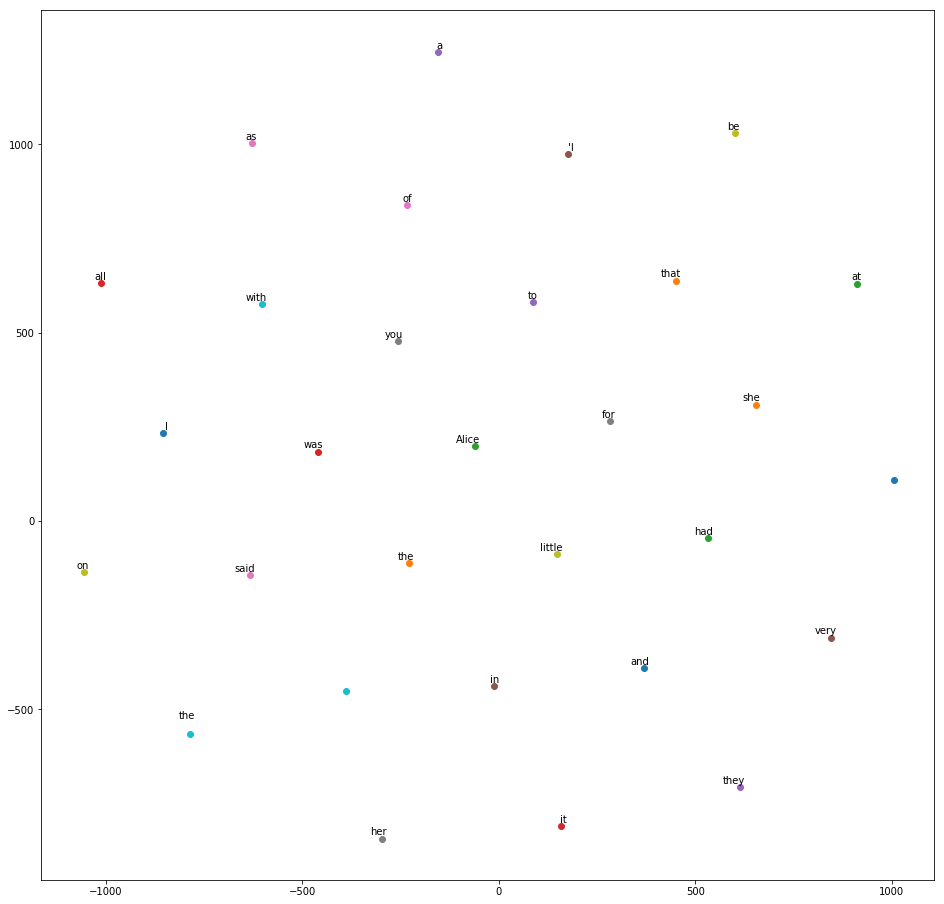

In [20]:
# A less selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

# It's Becoming Hard to Read

With a dataset this large, its difficult to make an easy-to-read TSNE visualization. What you can do is use the model to look up the most similar words from any given point. 

In [21]:
model.most_similar('Alice')

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/home/ahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('to', 0.9993987679481506),
 ('and', 0.9993315935134888),
 ('a', 0.9992502331733704),
 ('she', 0.999239444732666),
 ('the', 0.9992326498031616),
 ('her', 0.9992140531539917),
 ('on', 0.9992079734802246),
 ('it', 0.9991763830184937),
 ('of', 0.9991626739501953),
 ('said', 0.9991419911384583)]

In [38]:
model.most_similar('the')

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/home/ahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('a', 0.9899547100067139),
 ('and', 0.9885813593864441),
 ('of', 0.9879854917526245),
 ('she', 0.9869915246963501),
 ('in', 0.9869109988212585),
 ('to', 0.9863301515579224),
 ('was', 0.9832858443260193),
 ('as', 0.9832392930984497),
 ('that', 0.9817291498184204),
 ('you', 0.9800249338150024)]

# The End

Good luck!